# Project 2

### Import Dependencies

In [29]:
!pip install pprint
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import json
import pymongo
from pymongo import MongoClient


In [30]:
NYS_trans_csv_path = 'NYS Construction Data.csv'
# Import the data into a Pandas DataFrame
trans_df = pd.read_csv(NYS_trans_csv_path)
trans_df.head()

,Region,Status,Construction Amount,Federal Funding,State Funding,Local Funding,Current Award Amount,Estimated or Actual Completed Date,Schedule Performance,Cost Performance
0,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,1114305.42,2019-10-02T00:00:00.000,GREEN,GREEN
1,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,6922952.57,2018-11-01T00:00:00.000,GREEN,YELLOW
2,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,5167035.87,2019-01-09T00:00:00.000,GREEN,GREEN
3,01 CAPITAL DISTRICT,Under Construction,NaN,Yes,Yes,No,4634531.00,2020-10-02T00:00:00.000,GREEN,GREEN
4,01 CAPITAL DISTRICT,Under Construction,NaN,No,Yes,No,1920965.00,2019-05-31T00:00:00.000,GREEN,GREEN


In [31]:
trans_df.columns

Index(['Region', 'Status', 'Construction Amount', 'Federal Funding',
       'State Funding', 'Local Funding', 'Current Award Amount',
       'Estimated or Actual Completed Date', 'Schedule Performance',
       'Cost Performance'],
      dtype='object')

In [32]:
dff = pd.DataFrame({
    "Region":trans_df["Region"],
    "Status":trans_df["Status"],
    "Federal Funding":trans_df["Federal Funding"],
    "State Funding":trans_df["State Funding"],
    "Local Funding":trans_df["Local Funding"],
    "Current Award Amount":trans_df["Current Award Amount"],
    "Schedule Performance":trans_df["Schedule Performance"],
    "Cost Performance":trans_df["Cost Performance"]
})
dff.head()

,Region,Status,Federal Funding,State Funding,Local Funding,Current Award Amount,Schedule Performance,Cost Performance
0,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No,1114305.42,GREEN,GREEN
1,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No,6922952.57,GREEN,YELLOW
2,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No,5167035.87,GREEN,GREEN
3,01 CAPITAL DISTRICT,Under Construction,Yes,Yes,No,4634531.00,GREEN,GREEN
4,01 CAPITAL DISTRICT,Under Construction,No,Yes,No,1920965.00,GREEN,GREEN


# Extract JSON data into a DataFrame

In [54]:
# pd.read_json(json_file).head()
import json
import pprint
import requests
import urllib
import numpy as np

x = "file:///C:/Users/Liana/Desktop/Data%20Science_LAM/Project%202/socrata_metadata.json"


In [55]:
connection = urllib.request.urlopen(x)

js = connection.read()
info = json.loads(js.decode("utf-8"))
js


b'{"provenance": "official", "viewLastModified": 1564783402, "hideFromDataJson": false, "rowsUpdatedBy": "xzik-pf59", "publicationStage": "published", "displayType": "table", "columns": [{"position": 1, "id": 421205602, "cachedContents": {"not_null": "2075", "cardinality": "2074", "top": [{"count": "2", "item": "350641"}, {"count": "1", "item": "893308"}, {"count": "1", "item": "606710"}, {"count": "1", "item": "304365"}, {"count": "1", "item": "909589"}, {"count": "1", "item": "051654"}, {"count": "1", "item": "581383"}, {"count": "1", "item": "780672"}, {"count": "1", "item": "881126"}, {"count": "1", "item": "881383"}, {"count": "1", "item": "581316"}, {"count": "1", "item": "6V2016"}, {"count": "1", "item": "X11019"}, {"count": "1", "item": "0T2040"}, {"count": "1", "item": "780668"}, {"count": "1", "item": "0T1591"}, {"count": "1", "item": "1SIP19"}, {"count": "1", "item": "780704"}, {"count": "1", "item": "005903"}, {"count": "1", "item": "9TCR21"}], "null": "0", "largest": "XM25

## LOAD DATA IN MONGODB

### 1. Connect to MongoDB

In [12]:
client = MongoClient('mongodb://localhost:27017/')

In [13]:
# Drop Database if exists
dblist = client.list_database_names()
if "TransDB" in dblist:
    print("The database exists.") 
    client.drop_database('TransDB')
else:
    print("Database Does not exist")

The database exists.


In [14]:
# Create 'TransDB' database in Mongo
db = client["TransDB"]
print(client.list_database_names())

['admin', 'config', 'local', 'test']


### 3. Create Collections

In [18]:
list_collection = ["NYCRegions"]
for item in list_collection:
    collection = db[item]
    if item in db.list_collection_names():
        print(F"{item} collections exists. Dropping and recreating the collection")
        collection.drop()
        db[item]
    else:
        print(F"{item} does not exist. Creating the collection")
        db[item]

NYCRegions does not exist. Creating the collection


### 4. Load Documents in newly created collections

In [19]:
# Prepare Data to Load the "Transportation_Data" 
collection = db["Transportation"]
Transportation_Data = json.loads(dff.to_json(orient='records'))


# Insert Documents in "Transportation_Data" collection
x = collection.insert_many(Transportation_Data)
pprint(x)

### 5. Preview the List of Collections in TransDB

In [22]:
print(db.list_collection_names())

['Transportation']


### 6. Preview Documents in Collections

In [23]:
Transportation_Data = db.Transportation_Data.find()

# Iterate through each student in the collection
for row in Transportation_Data:
    pprint(row)

# DATA ANALYSIS

### Analyze Region by Status

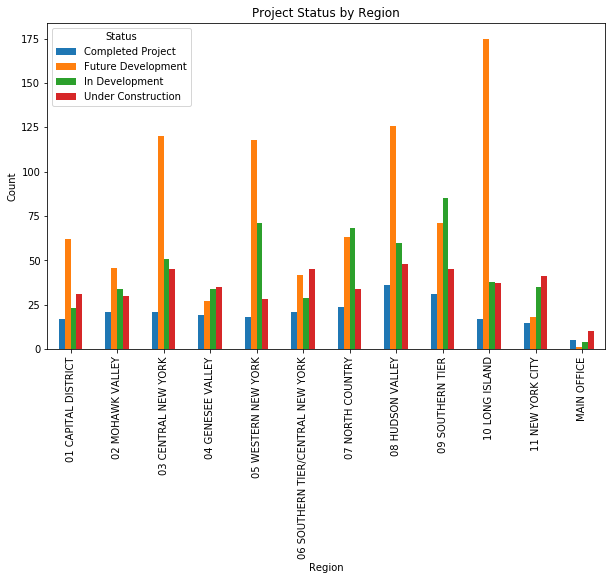

In [123]:


test5 = dff.groupby(['Region', 'Status'])['Region'].count().unstack('Status').fillna(0)

test5.plot(kind='bar', figsize= (10,6), stacked=False)
plt.ylabel('Count')
plt.title('Project Status by Region')

plt.savefig('Region by Project Status.png', bbox_inches="tight")

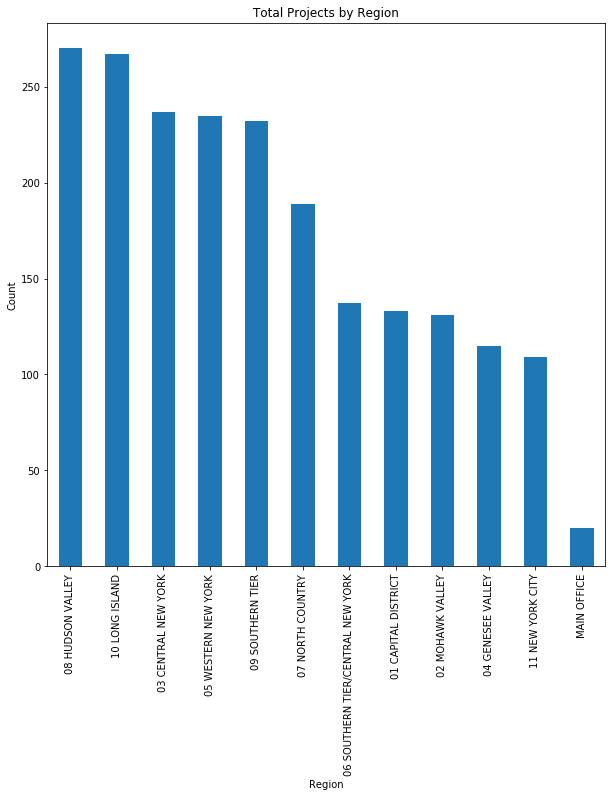

In [79]:
plt.figure(figsize = (10,10))
dff.groupby(dff['Region']).size().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total Projects by Region')
plt.savefig('Total Projects by Region.png', bbox_inches="tight")

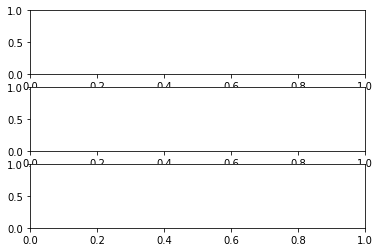

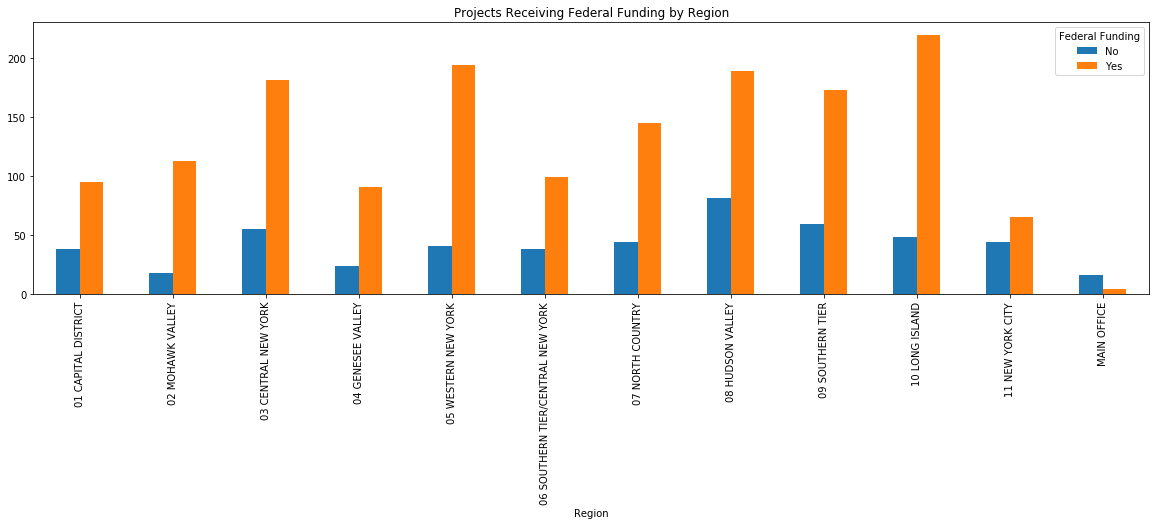

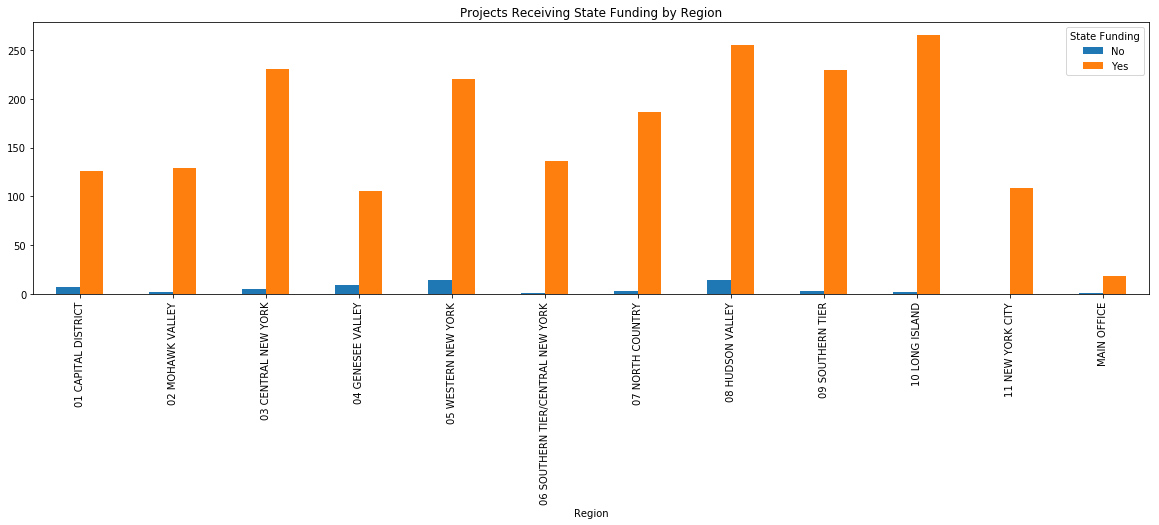

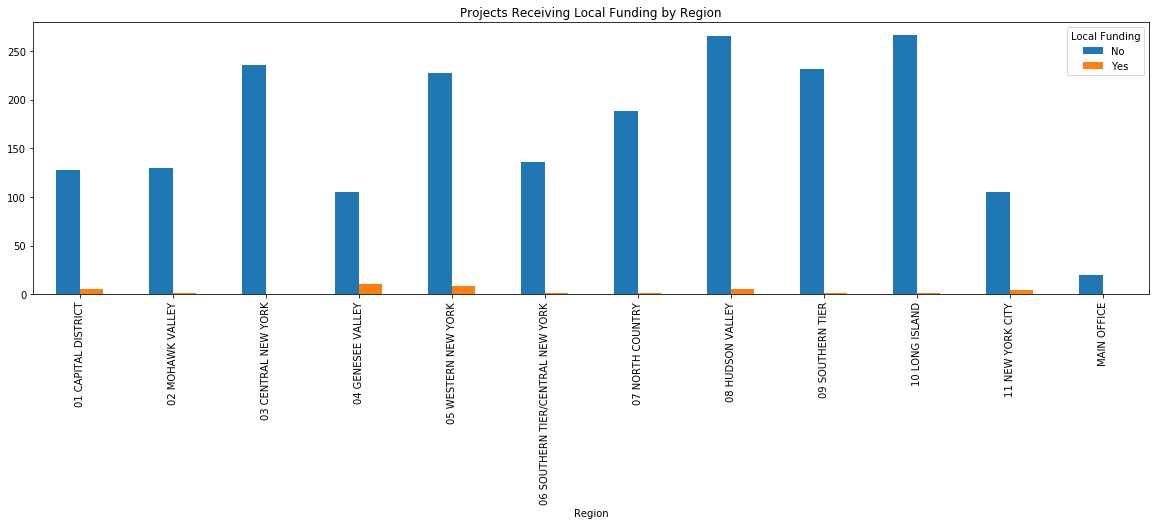

AttributeError: 'DataFrame' object has no attribute 'savefig'

In [142]:
fig, (fed, state, local) = plt.subplots(3, 1)

fed = dff.groupby(['Region', 'Federal Funding'])['Region'].count().unstack('Federal Funding').fillna(0)
fed.plot(kind='bar', figsize=(20,5), stacked=False)
plt.title('Projects Receiving Federal Funding by Region')


state = dff.groupby(['Region', 'State Funding'])['Region'].count().unstack('State Funding').fillna(0)
state.plot(kind='bar', figsize=(20,5), stacked=False)
plt.title('Projects Receiving State Funding by Region')


local = dff.groupby(['Region','Local Funding'])['Region'].count().unstack('Local Funding').fillna(0)
local.plot(kind='bar', figsize=(20,5), stacked=False)
plt.title('Projects Receiving Local Funding by Region')
plt.show()

fed.savefig('Federal Funding by Region.png', bbox_inches="tight")
state.savefig('State Funding by Region.png', bbox_inches="tight")
local.savefig('Local Funding by Region.png', bbox_inches="tight")


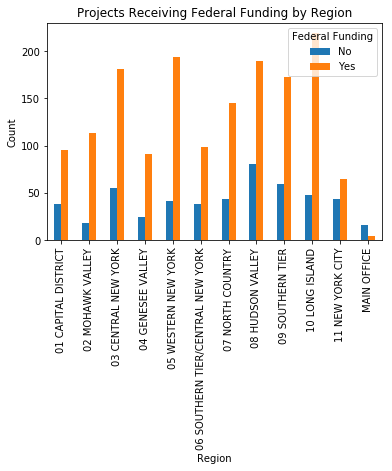

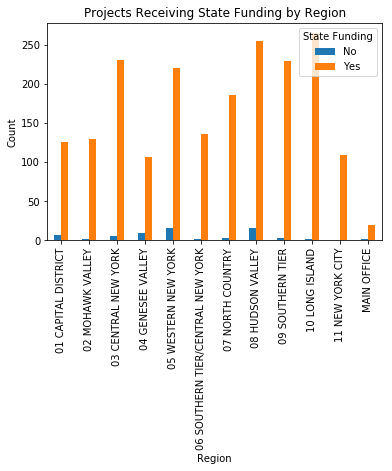

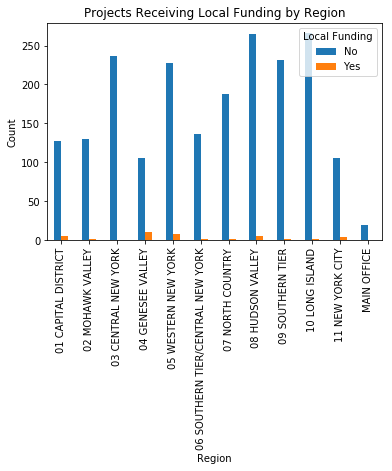

In [132]:
# Be sure to put them in parenthesis

# Use ax1 to plot Federal Funding
ax1 = dff.groupby(['Region', 'Federal Funding'])['Region'].count().unstack('Federal Funding').fillna(0)
ax1.plot(kind='bar',  stacked=False)
plt.ylabel('Count')
plt.title('Projects Receiving Federal Funding by Region')

ax2 = dff.groupby(['Region', 'State Funding'])['Region'].count().unstack('State Funding').fillna(0)
ax2.plot(kind='bar',  stacked=False)
plt.ylabel('Count')
plt.title('Projects Receiving State Funding by Region')

ax3 = dff.groupby(['Region', 'Local Funding'])['Region'].count().unstack('Local Funding').fillna(0)
ax3.plot(kind='bar',  stacked=False)
plt.ylabel('Count')
plt.title('Projects Receiving Local Funding by Region')

plt.savefig('Fund Source by Region.png')



In [ ]:
ax2